
# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 
### Question(s) for Analysis

* If the  age affect number of patient that show?
* what day of the week has more patient?
* Does gender affect the numner of patient that show for appointment?
* does SMS_received  affect the number of patient that shows?

importing all libraries needed for the project

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


loading the csv dataset using the read_csv

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd .read_csv('med_appoint.csv')


looking at the first few rows of the data using.head():

In [7]:

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


just for safe practise ,converting all column name to small letters

In [8]:
df= df.rename(columns=lambda x:x.lower())

Display all number of unique value using nunique().

In [9]:
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

finding for null value using isnull() method

In [10]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

To show duplicated value for patientid

In [11]:
df['patientid'].duplicated().sum()

48228

To show duplicated value for appointmentid

In [12]:
df['appointmentid'].duplicated().sum()

0

This goes to show that same patients may have different appointment day.

The shape of the dataset

In [13]:
df.shape

(110527, 14)

number of patient that shows and patient that did not show

In [14]:
df['no-show'].value_counts()

No     88208
Yes    22319
Name: no-show, dtype: int64

Display info about each column using .info() method.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


reviewing some descriptive statistics of our data:

In [16]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The scheduleday and appointmentday datatype is object(str)
convert to datetime

In [17]:
# converting the scheduleday and appointmentday to datetime
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

looking at the first few rows of the data using.head():

In [18]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


descriptive statistics for column age

In [19]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Age cant be a negative value, hence us the replace method to replace -1 to 0

In [20]:
df['age'].replace(to_replace=[-1],value=[0],inplace=True) 

Adding days of the week as a column in the dataset

In [21]:
df['dayofweek'] =df['appointmentday'].apply(lambda x:x.dayofweek)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,dayofweek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


Using a dictionary to filter the number to monday to sunday

In [22]:
dict_day={0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}
dict_day

{0: 'monday',
 1: 'tuesday',
 2: 'wednesday',
 3: 'thursday',
 4: 'friday',
 5: 'saturday',
 6: 'sunday'}

mapping the days of the week to the respective number

In [23]:
dict_day={0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}
df['dayofweek'] =df['dayofweek'].map(dict_day)

display the days of the week with corresponding number

In [24]:
df['dayofweek']

0            friday
1            friday
2            friday
3            friday
4            friday
5            friday
6            friday
7            friday
8            friday
9            friday
10           friday
11           friday
12           friday
13           friday
14           friday
15           friday
16           friday
17           friday
18           friday
19           friday
20           friday
21           friday
22           friday
23           friday
24           friday
25           friday
26           friday
27           friday
28           friday
29           friday
            ...    
110497    wednesday
110498    wednesday
110499    wednesday
110500    wednesday
110501    wednesday
110502    wednesday
110503    wednesday
110504    wednesday
110505    wednesday
110506    wednesday
110507    wednesday
110508    wednesday
110509    wednesday
110510    wednesday
110511    wednesday
110512    wednesday
110513    wednesday
110514    wednesday
110515    wednesday


to display the dataset and to be show the chances took effect

In [25]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,dayofweek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,friday


rename colum No-show to noshow

In [26]:
df.rename(columns={'no-show':'noshow'}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



### overview of the whole dataset using histogram.

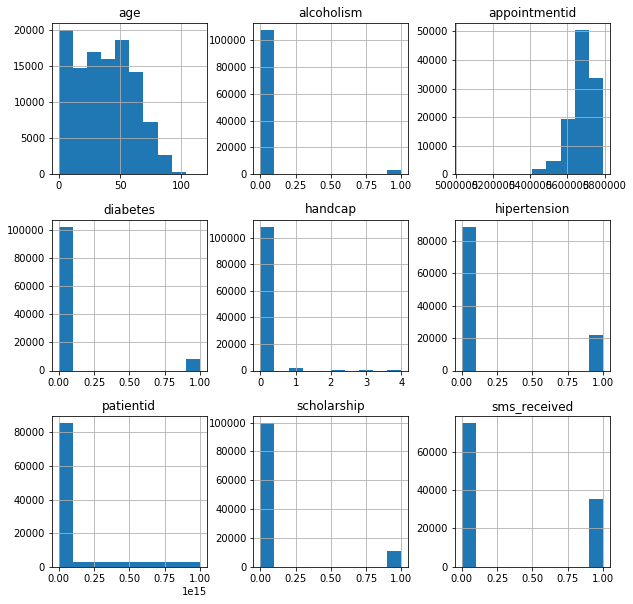

In [27]:
df.hist(figsize= (10,10));

###  Question 1=If the  age affect number of patient that show?

To know the age range that misses doctor appointment more.This may give us an insight of the age groups that tend to miss appointment and how to focus on does age range

let's create masks according to noshow values

In [28]:
present = df['noshow']=='Yes'
absent = df['noshow']=='No'

The mean of present patient

In [29]:
df.age[present].mean()

34.317666562121957

The mean of absent patient

In [30]:
df.age[absent].mean()

37.790075730092511

Explore noshow variable with a histogram using matplotlib.

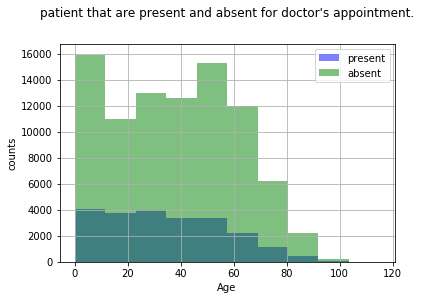

In [31]:
df.age[present].hist(alpha=0.5,label='present',color='blue');
df.age[absent].hist(alpha=0.5,label='absent',color='green');
plt.title("patient that are present and absent for doctor's appointment.", x=0.5, y=1.1)
plt.xlabel('Age')
plt.ylabel('counts')
plt.legend();

* This shows that younger patients tend to miss doctors appointment more than the older ones.
* hence it mny be for various reasons ,may be they are more healther or maybe they are busy
* Age is  a determinate factor to suggest that its influence the showup appointment


### Question 2= Does gender affect the number of patient that show for appointment?
* To check the percentge of male to female 
* To know if the gender influence the doctors appointment 
* To kow the pecentage of male to female that misses appointment

checking the value counts of the unique value of gender and puting in percentage

In [32]:
gender_count=df['gender'].value_counts(normalize=True)
gender_count

F    0.649977
M    0.350023
Name: gender, dtype: float64

using pie chart to show percentage of female to male

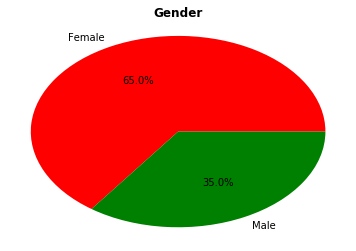

In [33]:
plt.pie(gender_count, labels = ['Female', 'Male'], colors=['red', 'green'], 
        radius = 1.1, autopct = '%1.1f%%')

plt.title('Gender', fontweight="bold")

plt.show()

### Base on the pie chart female patients are higher than male patient with 65% to 35%

groupby by gender to show number of male and female that miss and didnt miss appointment 

In [34]:
filt=df.groupby(['gender'])['noshow'].value_counts(normalize=True)
filt

gender  noshow
F       No        0.796854
        Yes       0.203146
M       No        0.800321
        Yes       0.199679
Name: noshow, dtype: float64

Displaying with a bar chart the percentage of gender that miss appointment and gender that didnt miss

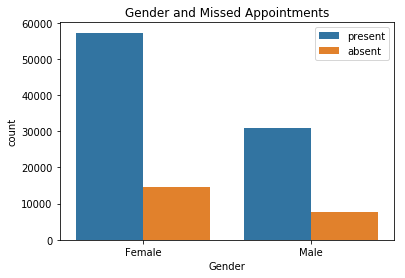

In [35]:
filt = sns.countplot(x="gender", hue="noshow", data=df)
filt.set(title='Gender and Missed Appointments')
plt.xticks([0, 1], ['Female', 'Male'])
filt.set_xlabel('Gender')
L=plt.legend()
L.get_texts()[0].set_text('present')
L.get_texts()[1].set_text('absent')
plt.show()

* female shows up to appointment more base on the chart
* its shows that 79% of Female misses appointment and 21% shows of for appointment
* it shows that 80% of male misses appointment and just 20% shows up
* gender is not a determinate factor to suggest that its influence the showup appointment

### question 3 = what day of the week has more patient
To check fot the day of the week that has more patient and to know if it influence the appointment

unique vaue for day ofthe weeek

In [36]:
df['dayofweek'].unique()

array(['friday', 'tuesday', 'monday', 'wednesday', 'thursday', 'saturday'], dtype=object)

Using a bar chart to show the days of thw week patient shows up and when patient doesnt show up

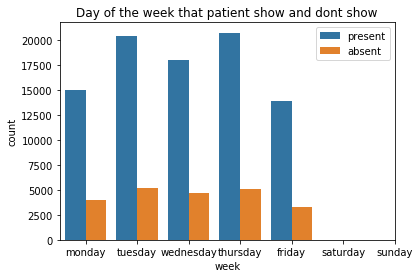

In [37]:
week_filt = sns.countplot(x="dayofweek", hue="noshow", data=df)
week_filt.set(title='Day of the week that patient show and dont show')
plt.xticks([0, 1,2,3,4,5,6], ['monday', 'tuesday','wednesday','thursday','friday','saturday','sunday'])
week_filt.set_xlabel('week')
L=plt.legend()
L.get_texts()[0].set_text('present')
L.get_texts()[1].set_text('absent')
plt.show()

### The chart shows patients come mostly on tuesdays followed by thusdays:


* This indicate that tuesdays and thusday ,patient shows more for appointment. meanwhile on saturnday and sunday people dont show up 



### Question 4=Does SMS_received  affect the number of patient that shows?

0 for false and 1 for true. display numbers of patient that recieved sms and patient that didnt recieve

In [38]:
data = df['sms_received'].value_counts()
data

0    75045
1    35482
Name: sms_received, dtype: int64

Groupby function to group by sms-recieved 

In [39]:
sms=df.groupby('sms_received')['noshow'].value_counts()
sms

sms_received  noshow
0             No        62510
              Yes       12535
1             No        25698
              Yes        9784
Name: noshow, dtype: int64

Bar chart to display level of patient that recieved sms and level of patient thst didnt recieve sms

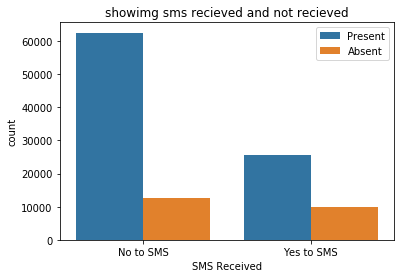

In [40]:
sms = sns.countplot(x="sms_received", hue="noshow", data=df)
sms.set(title='showimg sms recieved and not recieved')
plt.xticks([0, 1], ['No to SMS', 'Yes to SMS'])
sms.set_xlabel('SMS Received')
L=plt.legend()
L.get_texts()[0].set_text('Present')
L.get_texts()[1].set_text('Absent')
plt.show()

* using descriptive statistics
* Patients who didn't receive the SMS showed up more than those who received it.

### Conclusions

* Patient that are younger has higher tendency of not showing up,this might be based on different reason ,maybe younger people has better health than older people .

* female shows up to appointment more base on the chart but the chart also shows us the percentage of female to male is greater by 64%

* The chart shows pateient come mostly on tuesdays followed by wednesday:
    tuesday = 5152 appointments and Wednesday = 5093 appointments

* Patients who didn't receive the SMS showed up more than those who received it.

### Limitations

* Age cant be a negative number(-1)and it is not so realistic to place age at 0 too

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0